# titanic data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [3]:
train = pd.read_csv('titanic-train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Data

<AxesSubplot:>

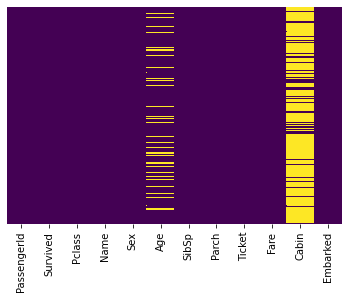

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Ignore Cabin column to many null values.

Replace null values of age with average?

<AxesSubplot:xlabel='Survived', ylabel='count'>

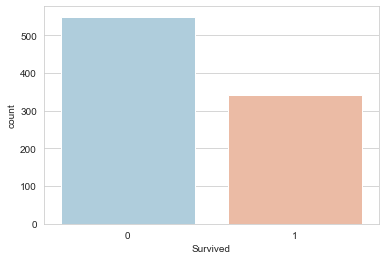

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

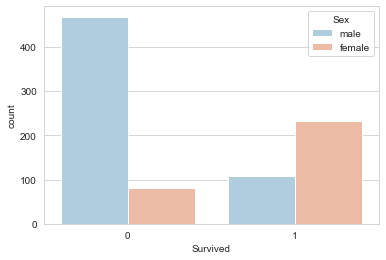

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

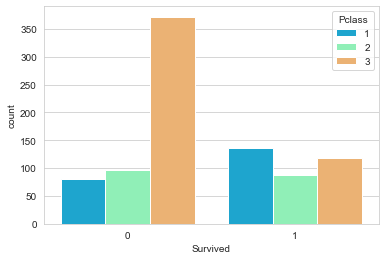

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<AxesSubplot:xlabel='Age', ylabel='Count'>

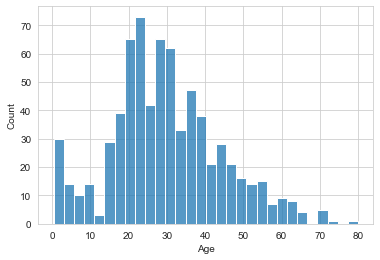

In [13]:
sns.histplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='Survived', ylabel='count'>

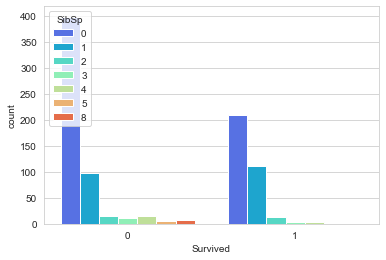

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train,palette='rainbow')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

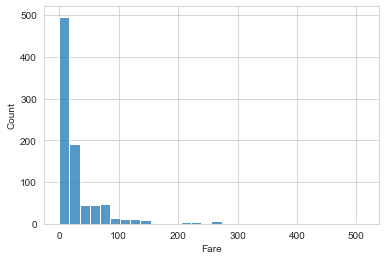

In [15]:
sns.histplot(train['Fare'].dropna(),kde=False,bins=30)

### Fix null values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

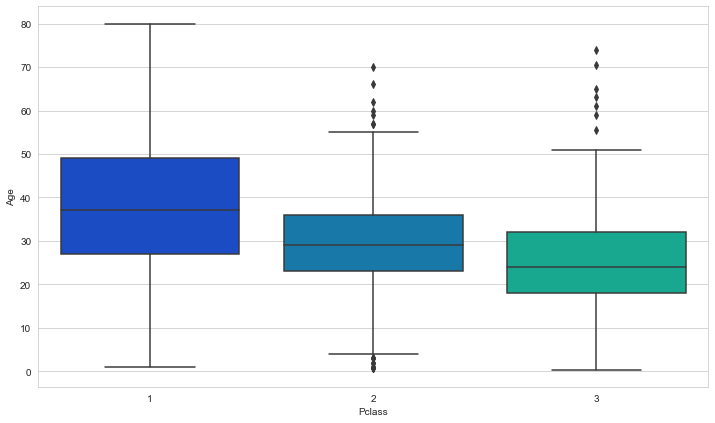

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

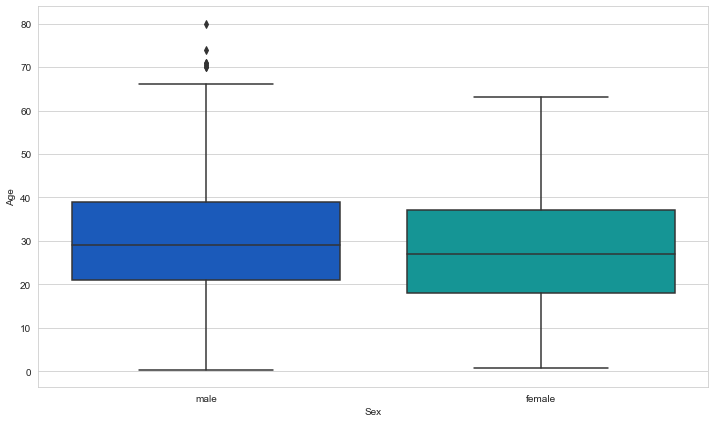

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=train,palette='winter')

In [20]:
train.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):

        if Pclass == 1 and Sex =='female':
            return 35
        elif Pclass==1 and Sex=='male':
            return 41
        elif Pclass == 2 and Sex=='female':
            return 29
        elif Pclass == 2 and Sex=='male':
            return 31
        elif Pclass == 3 and Sex=='female':
            return 22
        else:
            return 27

    else:
        return Age

In [26]:
train['Age'] = train[['Age','Pclass', 'Sex']].apply(impute_age,axis=1)
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

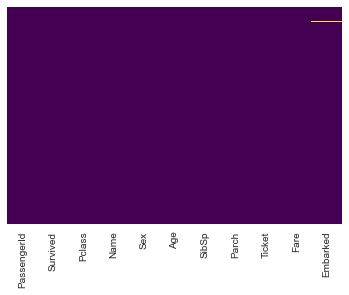

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Seem to be only one null value, we can delete ir

In [28]:
train.dropna(inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### New features

In [34]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])

<AxesSubplot:xlabel='Survived', ylabel='count'>

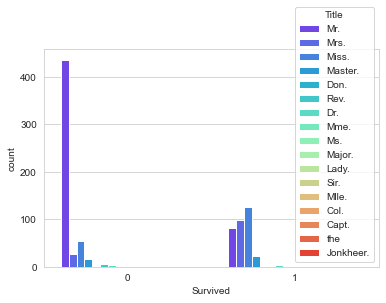

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Title',data=train,palette='rainbow')

In [54]:
train.groupby('Title')['Survived'].count()

Title
Capt.          1
Col.           2
Don.           1
Dr.            7
Jonkheer.      1
Lady.          1
Major.         2
Master.       40
Miss.        181
Mlle.          2
Mme.           1
Mr.          517
Mrs.         124
Ms.            1
Rev.           6
Sir.           1
the            1
Name: Survived, dtype: int64

In [51]:
train['Ticket_first_letters'] = train['Ticket'].apply(lambda x: x.split(' ')[0] if len(x.split(' '))>1 else 'x')

In [52]:
train['Ticket_first_letters'] = train['Ticket_first_letters'].apply(lambda x: x.replace('.', '').replace('/', '').lower())

In [53]:
train.groupby('Ticket_first_letters')['Survived'].count()

Ticket_first_letters
a4           7
a5          21
as           1
c            5
ca          41
casoton      1
fa           1
fc           1
fcc          5
pc          60
pp           3
ppp          2
sc           1
sca4         1
scah         3
scow         1
scparis     11
soc          6
sop          1
sopp         3
sotono2      2
sotonoq     15
sp           1
stono       12
stono2       6
swpp         2
wc          10
wep          3
x          663
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

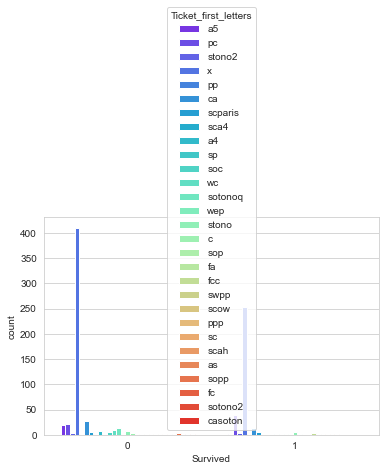

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Ticket_first_letters',data=train,palette='rainbow')

### Categorical features and Scaler

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           889 non-null    int64  
 1   Survived              889 non-null    int64  
 2   Pclass                889 non-null    int64  
 3   Name                  889 non-null    object 
 4   Sex                   889 non-null    object 
 5   Age                   889 non-null    float64
 6   SibSp                 889 non-null    int64  
 7   Parch                 889 non-null    int64  
 8   Ticket                889 non-null    object 
 9   Fare                  889 non-null    float64
 10  Embarked              889 non-null    object 
 11  Title                 889 non-null    object 
 12  Ticket_first_letters  889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 129.5+ KB


In [57]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
title = pd.get_dummies(train['Title'],drop_first=True)
ticket_letters = pd.get_dummies(train['Ticket_first_letters'],drop_first=True)

In [58]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [59]:
train = pd.concat([train,sex,embark, title, ticket_letters],axis=1)

In [63]:
train.drop(['Title', 'Ticket_first_letters'],axis=1,inplace=True)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,sopp,sotono2,sotonoq,sp,stono,stono2,swpp,wc,wep,x
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [68]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train[['Pclass', 'Age', 'Parch', 'Fare', 'male', 'Q', 'S']], 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train.drop(['Survived', 'PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [70]:
mm_scaler1 = preprocessing.StandardScaler()
X_train_scaled_1 = mm_scaler1.fit_transform(X_train_1)
X_test_scaled_1 = mm_scaler1.transform(X_test_1)

In [71]:
mm_scaler2 = preprocessing.StandardScaler()
X_train_scaled_2 = mm_scaler2.fit_transform(X_train_2)
X_test_scaled_2 = mm_scaler2.transform(X_test_2)

In [76]:
logmodel1 = LogisticRegression(max_iter=200)
logmodel1.fit(X_train_1,y_train_1)

LogisticRegression(max_iter=200)

In [83]:
logmodel2 = LogisticRegression(max_iter=1000)
logmodel2.fit(X_train_2,y_train_2)

LogisticRegression(max_iter=1000)

In [80]:
predictions1 = logmodel1.predict(X_test_1)

In [82]:
print(classification_report(y_test_1,predictions1))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       163
           1       0.78      0.66      0.72       104

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [85]:
predictions2 = logmodel2.predict(X_test_2)

In [86]:
print(classification_report(y_test_2,predictions2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       163
           1       0.86      0.73      0.79       104

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267

